In [ ]:
!pip install geopandas --quiet

In [ ]:
!unzip '/content/gadm41_SGP_shp.zip'

unzip:  cannot find or open /content/gadm41_SGP_shp.zip, /content/gadm41_SGP_shp.zip.zip or /content/gadm41_SGP_shp.zip.ZIP.


In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

covid_data=pd.read_csv('/content/covid19_sg.csv')

# Load the shapefile data of Singapore
shapefile_path = "/content/gadm41_SGP_0.shp"
map_data = gpd.read_file(shapefile_path)


In [ ]:
covid_data.head()

,Date,Daily Confirmed,False Positives Found,Cumulative Confirmed,Daily Discharged,Passed but not due to COVID,Cumulative Discharged,Discharged to Isolation,Still Hospitalised,Daily Deaths,...,Cumulative Individuals Vaccinated,Cumulative Individuals Vaccination Completed,Perc population completed at least one dose,Perc population completed vaccination,Sinovac vaccine doses,Cumulative individuals using Sinovac vaccine,Doses of other vaccines recognised by WHO,Cumulative individuals using other vaccines recognised by WHO,Number taken booster shots,Perc population taken booster shots
0,2020-01-23,1,NaN,1,0,0,0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-24,2,NaN,3,0,0,0,0,3,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-25,1,NaN,4,0,0,0,0,4,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-26,0,NaN,4,0,0,0,0,4,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-27,1,NaN,5,0,0,0,0,5,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
covid_data['Date']=pd.to_datetime(covid_data['Date'])

In [ ]:

start_date = pd.to_datetime('2020-04-01')
end_date = pd.to_datetime('2020-08-31')

In [ ]:
df_covid_wave_1 = covid_data[(covid_data['Date'] >= start_date) & (covid_data['Date'] <= end_date)]

In [ ]:
df_covid_wave_1.shape

(153, 36)

In [ ]:
start_date = pd.to_datetime('2021-08-1')
end_date = pd.to_datetime('2021-12-31')

In [ ]:
df_covid_wave_2 = covid_data[(covid_data['Date'] >= start_date) & (covid_data['Date'] <= end_date)]

In [ ]:
df_covid_wave_2.shape

(153, 36)

In [ ]:
covid_data.tail()

,Date,Daily Confirmed,False Positives Found,Cumulative Confirmed,Daily Discharged,Passed but not due to COVID,Cumulative Discharged,Discharged to Isolation,Still Hospitalised,Daily Deaths,...,Cumulative Individuals Vaccinated,Cumulative Individuals Vaccination Completed,Perc population completed at least one dose,Perc population completed vaccination,Sinovac vaccine doses,Cumulative individuals using Sinovac vaccine,Doses of other vaccines recognised by WHO,Cumulative individuals using other vaccines recognised by WHO,Number taken booster shots,Perc population taken booster shots
712,2022-01-04,842,0.0,281596,271,0,276936,3669,151,3,...,NaN,NaN,88%,87%,NaN,NaN,NaN,NaN,NaN,42%
713,2022-01-05,805,0.0,282401,453,0,277389,4015,155,2,...,NaN,NaN,88%,87%,NaN,NaN,NaN,NaN,NaN,43%
714,2022-01-06,813,0.0,283214,392,0,277781,4449,141,1,...,NaN,NaN,88%,87%,NaN,NaN,NaN,NaN,NaN,44%
715,2022-01-07,777,0.0,283991,338,0,278119,4892,135,2,...,NaN,NaN,89%,87%,NaN,NaN,NaN,NaN,NaN,44%
716,2022-01-08,811,0.0,284802,336,0,278455,5372,130,0,...,NaN,NaN,89%,87%,NaN,NaN,NaN,NaN,NaN,45%


In [ ]:
map_data.head()

,GID_0,COUNTRY,geometry
0,SGP,Singapore,"MULTIPOLYGON (((103.73493 1.17480, 103.73500 1..."


In [ ]:
covid_data['Date'] = pd.to_datetime(covid_data['Date'])

# Extract the month from the 'Date' column
covid_data['Month'] = covid_data['Date'].dt.month

# Group the data by month
grouped_data = covid_data.groupby(covid_data.Date.dt.month)['Daily Confirmed'].sum().reset_index(name='monthly_confirmed_cases')
# monthly_cases = covid_data.groupby('Month')['Daily Confirmed'].sum()
# covid_data.groupby(covid_data.Date.dt.month)['Daily Confirmed'].sum()

In [ ]:
# covid_wave_1
df_covid_wave_1['Date'] = pd.to_datetime(df_covid_wave_1['Date'])

# Extract the month from the 'Date' column
df_covid_wave_1['Month'] = df_covid_wave_1['Date'].dt.month

# Group the data by month
grouped_data_wave_1 = df_covid_wave_1.groupby(df_covid_wave_1.Date.dt.month)['Daily Confirmed'].sum().reset_index(name='monthly_confirmed_cases')


<ipython-input-63-9c230e95fcff>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_covid_wave_1['Date'] = pd.to_datetime(df_covid_wave_1['Date'])
<ipython-input-63-9c230e95fcff>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_covid_wave_1['Month'] = df_covid_wave_1['Date'].dt.month


In [ ]:
grouped_data_wave_1.shape

(5, 2)

In [ ]:
grouped_data_wave_1.head(8)

,Date,monthly_confirmed_cases
0,4,15243
1,5,18750
2,6,9023
3,7,8300
4,8,4607


In [ ]:
df_covid_wave_2['Date'] = pd.to_datetime(df_covid_wave_2['Date'])

# Extract the month from the 'Date' column
df_covid_wave_2['Month'] = df_covid_wave_2['Date'].dt.month

# Group the data by month
grouped_data_wave_2 = df_covid_wave_2.groupby(df_covid_wave_2.Date.dt.month)['Daily Confirmed'].sum().reset_index(name='monthly_confirmed_cases')


<ipython-input-66-9df333955aaf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_covid_wave_2['Date'] = pd.to_datetime(df_covid_wave_2['Date'])
<ipython-input-66-9df333955aaf>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_covid_wave_2['Month'] = df_covid_wave_2['Date'].dt.month


In [ ]:
grouped_data_wave_2.shape

(5, 2)

In [ ]:
grouped_data_wave_2.head()

,Date,monthly_confirmed_cases
0,8,2639
1,9,28901
2,10,101853
3,11,66351
4,12,14680


In [ ]:
# Assuming you have a separate DataFrame for the monthly confirmed cases data
wave_1 = pd.DataFrame({
    'Month': ['April_2020', 'May_2020','June_2020','July_2020','August_2020'],
    'ConfirmedCases': [15243,18750,9073,8300,4607],
    'COUNTRY':['Singapore','Singapore','Singapore','Singapore','Singapore']
})

In [ ]:
wave_2 = pd.DataFrame({
    'Month': ['August_2021','September_2021','October_2021','November_2021','December_2021'],
    'ConfirmedCases': [2639,28901,101853,66351,14680],
    'COUNTRY':['Singapore','Singapore','Singapore','Singapore','Singapore']
})

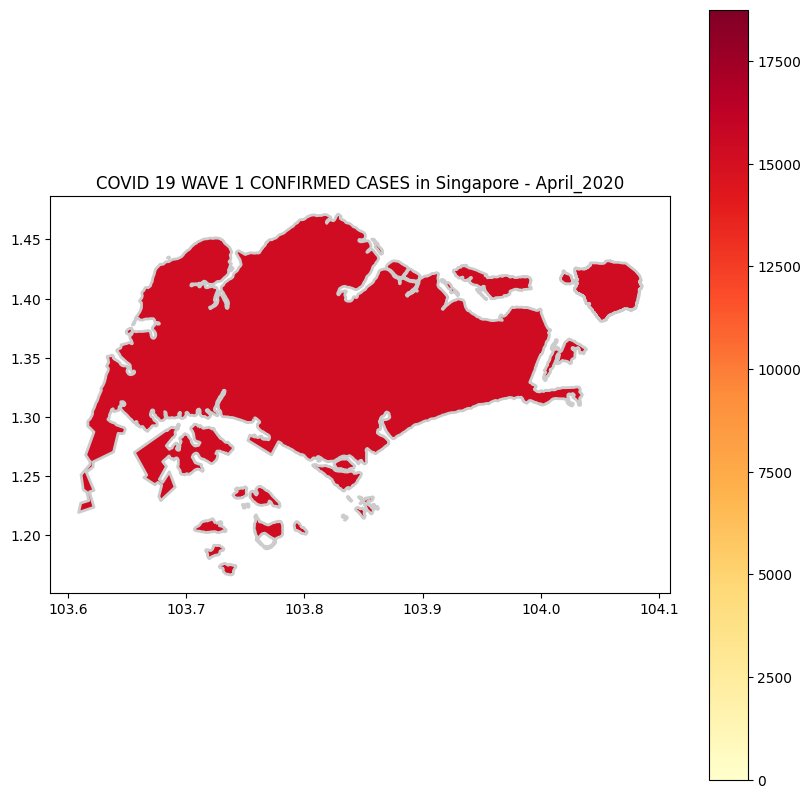

<Figure size 640x480 with 0 Axes>

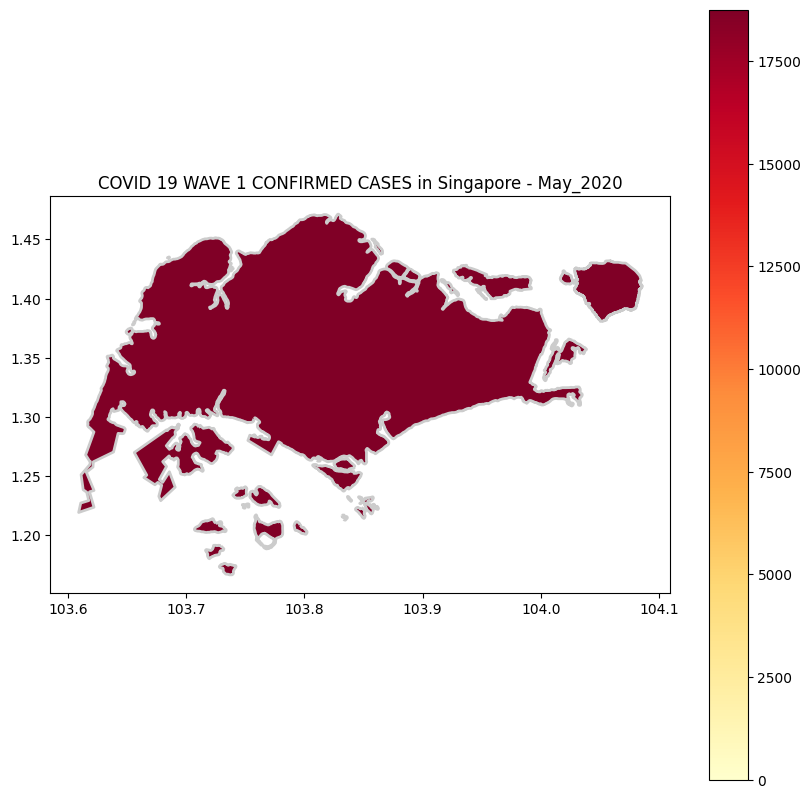

<Figure size 640x480 with 0 Axes>

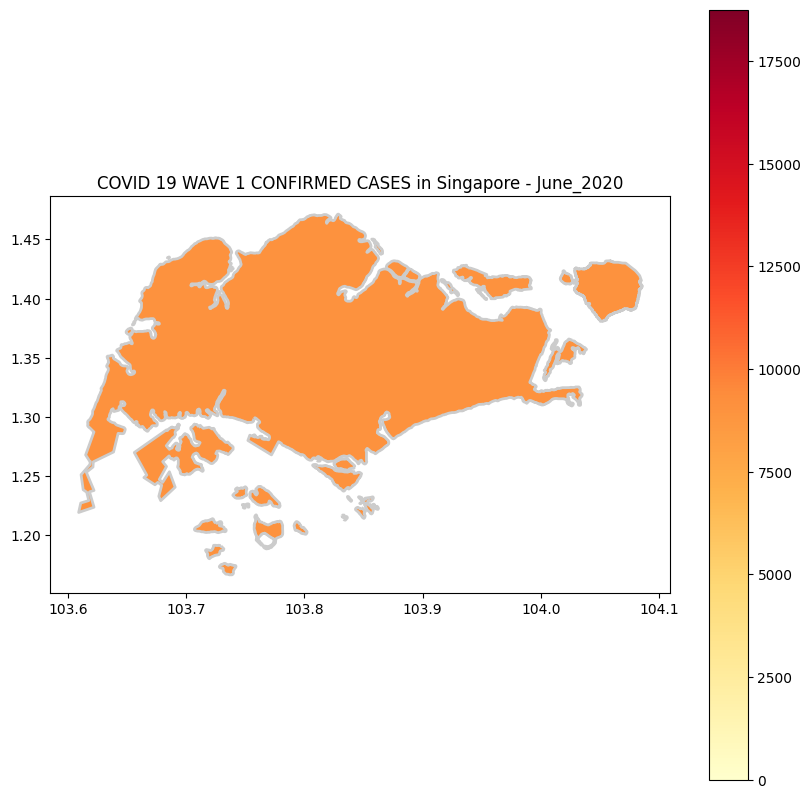

<Figure size 640x480 with 0 Axes>

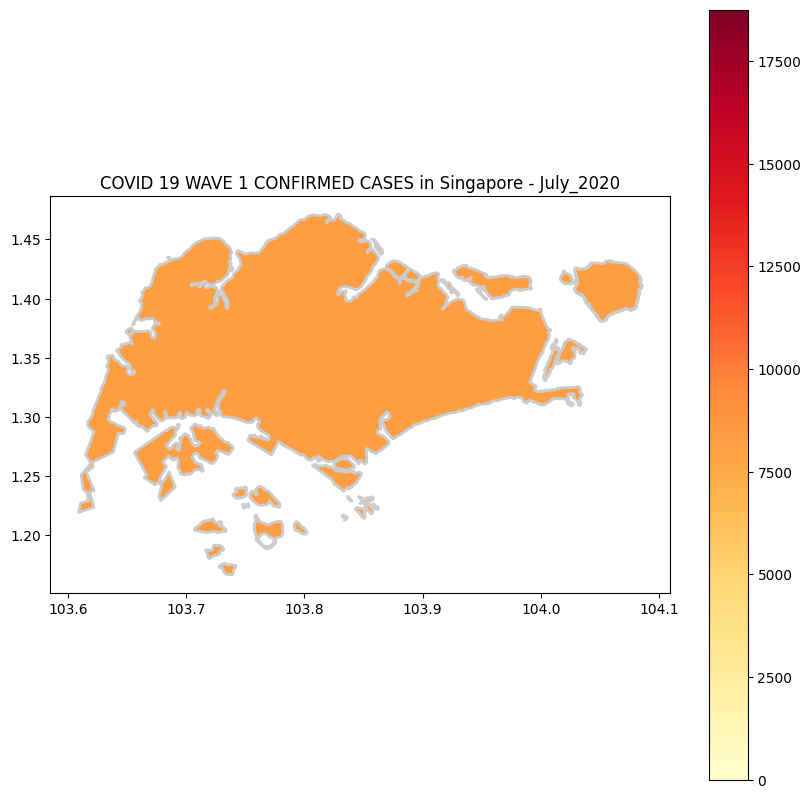

<Figure size 640x480 with 0 Axes>

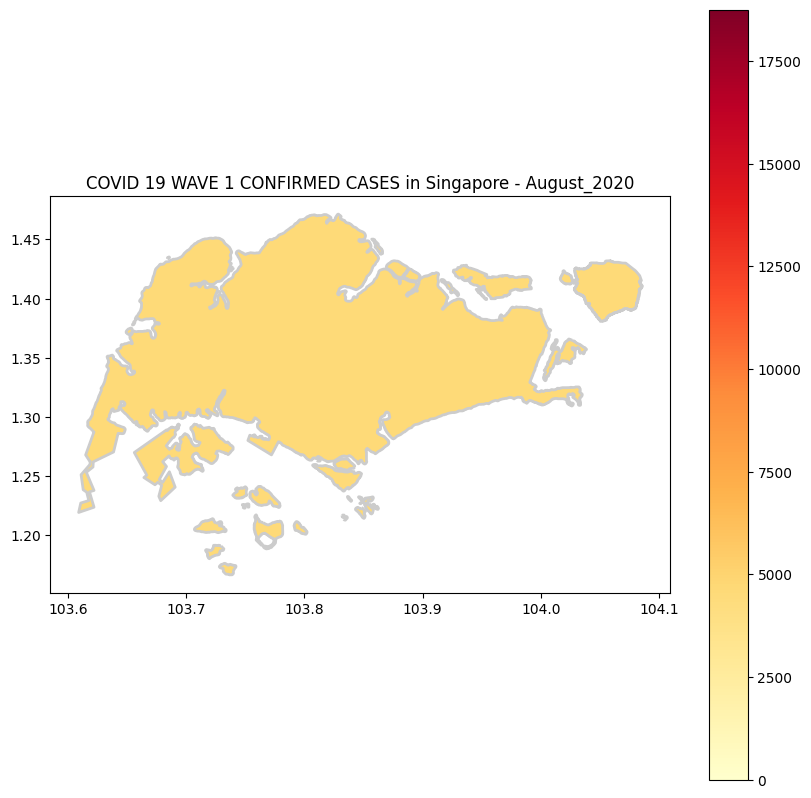

<Figure size 640x480 with 0 Axes>

In [ ]:
merged_wave_1 = map_data.merge(wave_1, on='COUNTRY')

# Get the unique months in the COVID-19 data
unique_months = merged_wave_1['Month'].unique()
max_cases = merged_wave_1['ConfirmedCases'].max()
# Iterate over each month and create separate plots
for month in unique_months:
    # Filter the merged DataFrame for the current month
    month_df = merged_wave_1[merged_wave_1['Month'] == month]

    # Create the plot for the current month
    fig, ax = plt.subplots(figsize=(10, 10))
    month_df.plot(column='ConfirmedCases', cmap='YlOrRd', linewidth=2, norm=plt.Normalize(0, max_cases), ax=ax, edgecolor='0.8', legend=True)
    ax.set_title(f'COVID 19 WAVE 1 CONFIRMED CASES in Singapore - {month}')

    # Show or save the plot as desired
    plt.show()
    plt.savefig(f'covid_wave_1_{month}.png')

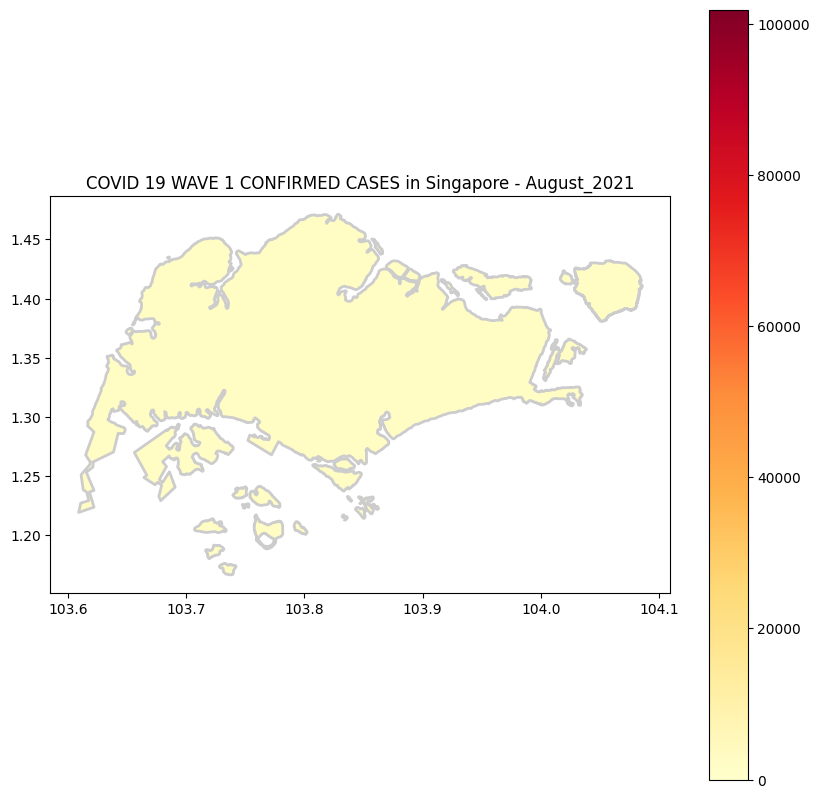

<Figure size 640x480 with 0 Axes>

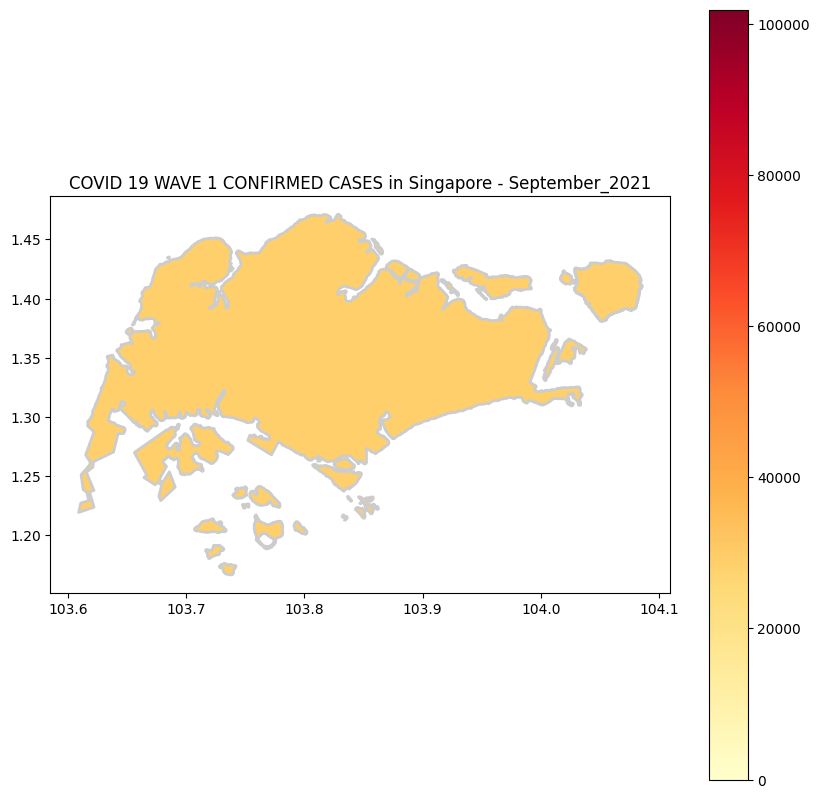

<Figure size 640x480 with 0 Axes>

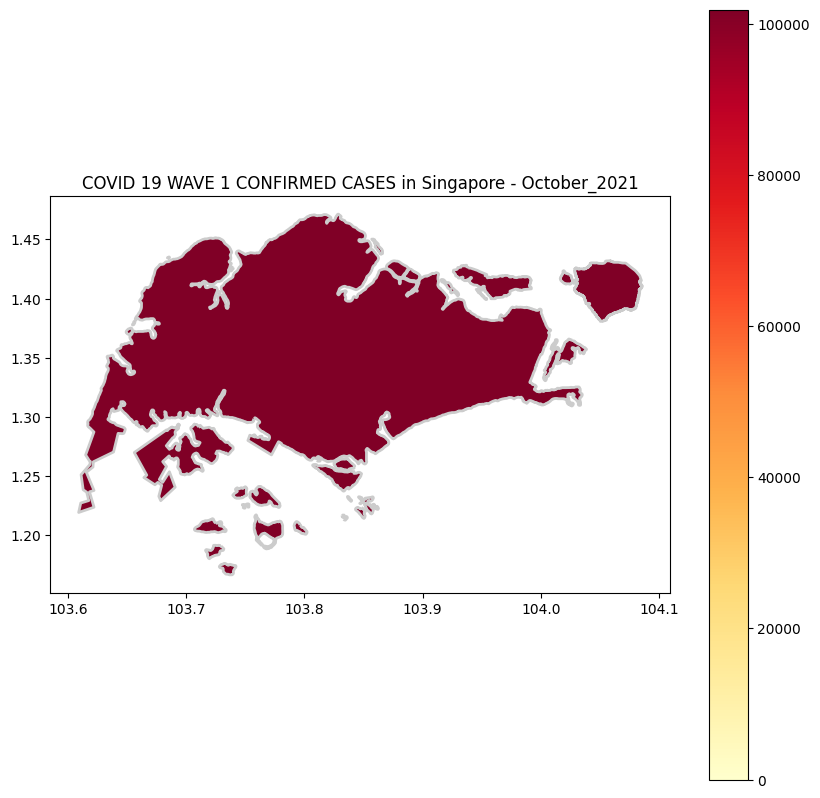

<Figure size 640x480 with 0 Axes>

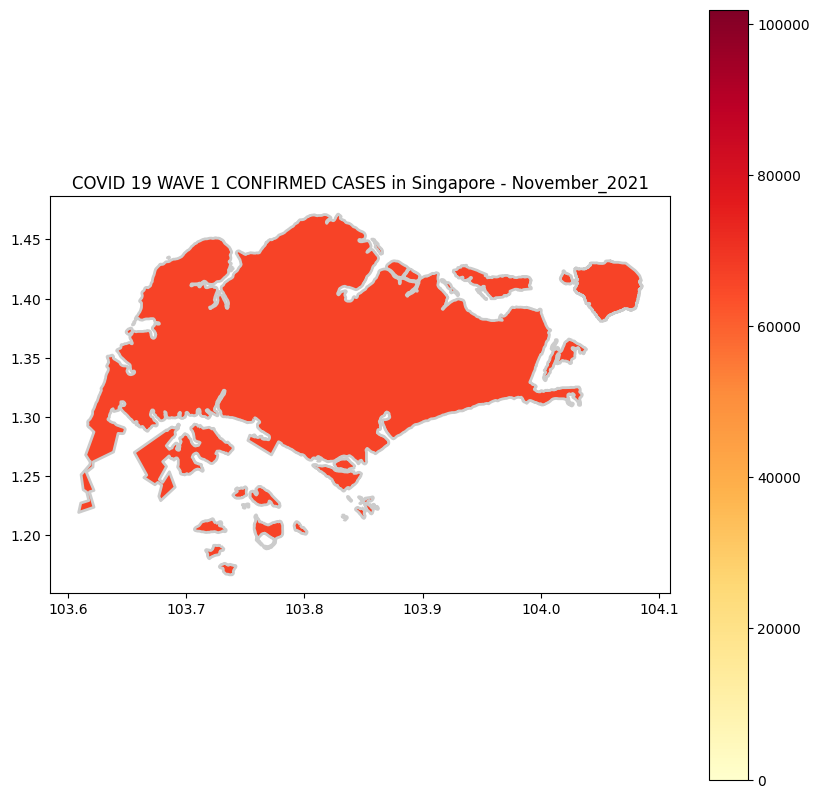

<Figure size 640x480 with 0 Axes>

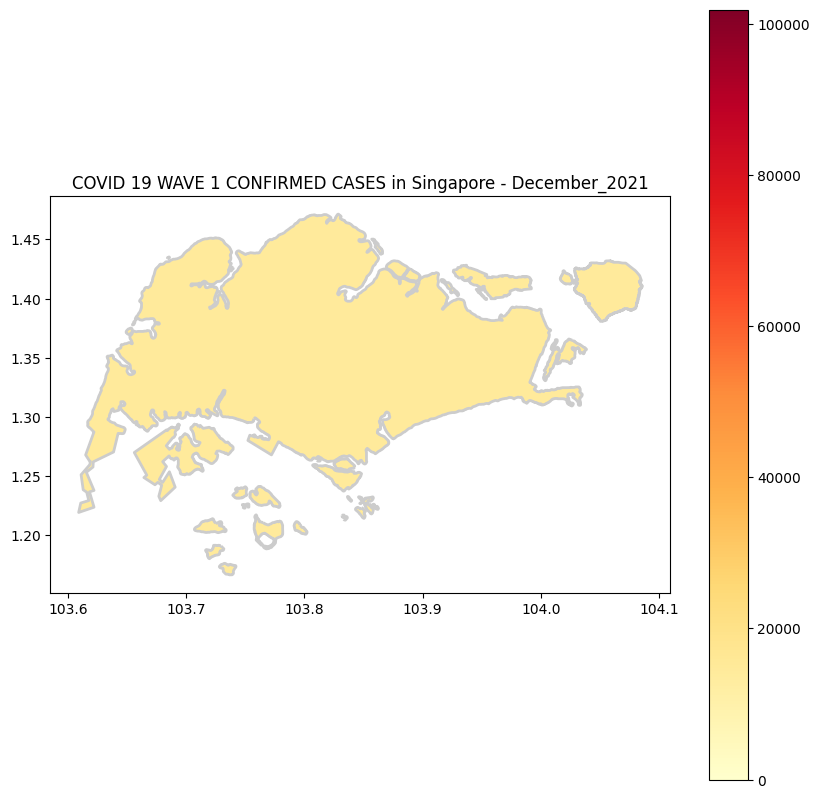

<Figure size 640x480 with 0 Axes>

In [ ]:
merged_wave_2 = map_data.merge(wave_2, on='COUNTRY')

# Get the unique months in the COVID-19 data
unique_months = merged_wave_2['Month'].unique()
max_cases = merged_wave_2['ConfirmedCases'].max()
# Iterate over each month and create separate plots
for month in unique_months:
    # Filter the merged DataFrame for the current month
    month_df = merged_wave_2[merged_wave_2['Month'] == month]

    # Create the plot for the current month
    fig, ax = plt.subplots(figsize=(10, 10))
    month_df.plot(column='ConfirmedCases', cmap='YlOrRd', linewidth=2, norm=plt.Normalize(0, max_cases), ax=ax, edgecolor='0.8', legend=True)
    ax.set_title(f'COVID 19 WAVE 1 CONFIRMED CASES in Singapore - {month}')

    # Show or save the plot as desired
    plt.show()
    plt.savefig(f'covid_wave_2_{month}.png')